In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
#from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation # animation
import imageio 
import sys
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape
import os
import functions
import fiona
from shapely.geometry import shape
import importlib
from functions import read_shapefile
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [3]:
path = '/Users/francesco/Desktop/prove/ntcdf_region_1.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:    (x: 1024, y: 1024, time: 12)
Coordinates:
  * x          (x) float32 -1.686e+06 -1.685e+06 ... -1.174e+06 -1.174e+06
  * y          (y) float32 -7.007e+05 -7.012e+05 ... -1.212e+06 -1.213e+06
  * time       (time) float32 2.005e+03 2.006e+03 ... 2.015e+03 2.016e+03
Data variables:
    bm         (time, y, x) float32 ...
    sic        (time, y, x) float32 ...
    thickness  (time, y, x) float32 ...
    v_x        (time, y, x) float32 ...
    v_y        (time, y, x) float32 ...
    masks      (time, y, x) float32 ...
Attributes:
    projection:   EPSG:3031
    description:  This NetCDF file contains the physical variables basal melt...
    history:      Created on 2024-05-15 by Francesco Moncada. You can find th...

In [11]:
mask = ds['masks']
mask

<xarray.DataArray 'masks' (time: 12, y: 1024, x: 1024)>
[12582912 values with dtype=float32]
Coordinates:
  * x        (x) float32 -1.686e+06 -1.685e+06 ... -1.174e+06 -1.174e+06
  * y        (y) float32 -7.007e+05 -7.012e+05 ... -1.212e+06 -1.213e+06
  * time     (time) float32 2.005e+03 2.006e+03 ... 2.015e+03 2.016e+03
Attributes:
    units:      [-]
    long_name:  mask containing informations about each pixel type. The value...

In [17]:
path_to_mask = '/Users/francesco/Desktop/machine_learning_calving_project/dataset_cnn/ice_mask.npy'
mask = np.load(path_to_mask, allow_pickle=True)
common_years = np.arange(2005, 2017)
index = np.arange(1,29)
mask = pd.DataFrame(mask, index=index, columns=common_years)

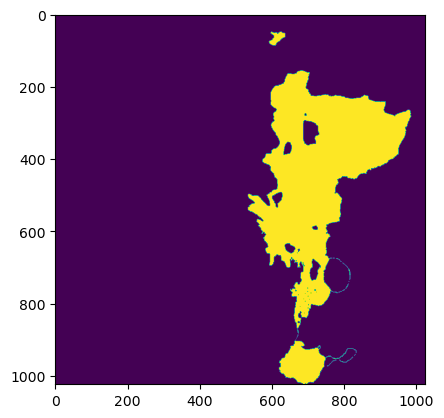

In [18]:
plt.imshow(mask.loc[4,2005])

In [2]:
region = '/Users/francesco/Desktop/squares.shp.gpkg'
# Open the shapefile

coords = []
    
with fiona.open(region, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    #Extract the boundary of the shapefile

    for i in range(len(shapes)):
        boundary = shape(shapes[i])
        #Extract the coordinates of the boundary
        xmin, ymin, xmax, ymax = boundary.bounds
        coords.append([xmin, ymin, xmax, ymax])

In [5]:
coord = coords[3]

In [7]:
#open with rasterio the file /Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_2005_warp_ps.tif
raster = '/Users/francesco/Desktop/Thesis/Data/GEOTIFFs/melt_2005_warp_ps.tif'

xmin, ymin, xmax, ymax = coord

with rasterio.open(raster, crs = 'EPSG:3031') as src:

    window = rasterio.windows.from_bounds(xmin, ymin, xmax, ymax, src.transform)
    melt = src.read(1, window=window)



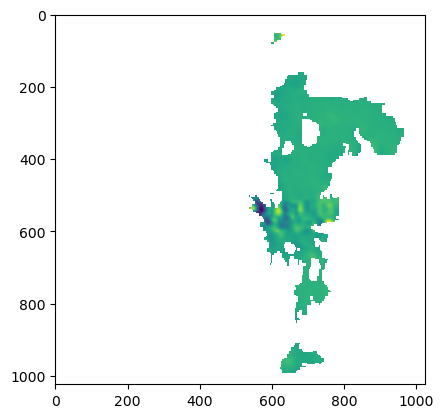

In [8]:
plt.imshow(melt)

In [51]:
dir_prova = '/Users/francesco/Desktop/prove/bm_region_4.npy'
prova = np.load(dir_prova, allow_pickle=True)

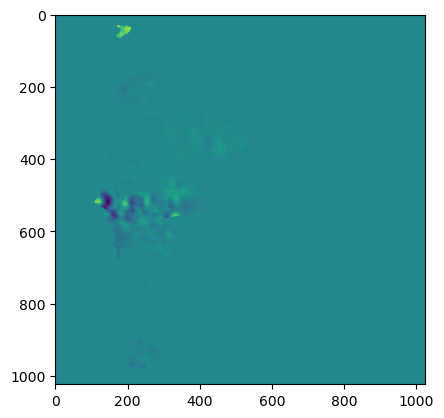

In [52]:
plt.imshow(prova[0,11])

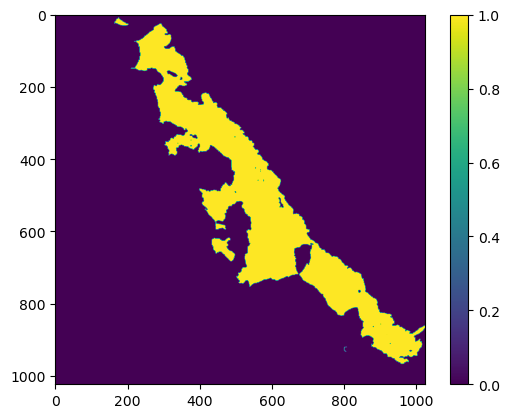

In [33]:
prove_dir = '/Users/francesco/Desktop/prove/y_pred_avg_temporal_prova_cv_conv7_relu_outputs_sigmoid.weights.npy'
#prove_dir = '/Users/francesco/Desktop/prove/y_pred_avg_temporal_prova_cv_conv7_relu5.weights.npy'

y_pred = np.load(prove_dir, allow_pickle=True)

plt.imshow(y_pred[0,:,:,0])
plt.colorbar()

Maximo:  1.0 Minimo:  0.0


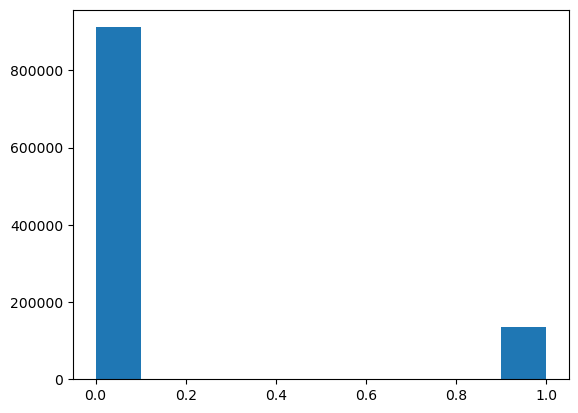

In [21]:
flatto = y_pred[0,:,:,0].flatten()
plt.hist(flatto, bins = 10)
max = np.max(flatto)
min = np.min(flatto)

print('Maximo: ', max, 'Minimo: ', min)

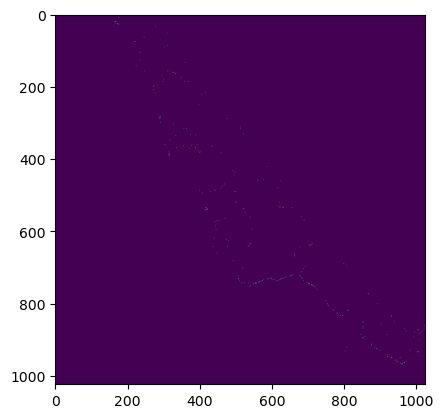

In [25]:
prova_1 = y_pred[0,:,:,0]
prova_2 = y_pred[0,:,:,0]

prova_1 = np.where(prova_1 > 0.1, 1, 0)

prova_2 = np.where(prova_2 > 0.9, 1, 0)

diff = prova_1 - prova_2

plt.imshow(diff)

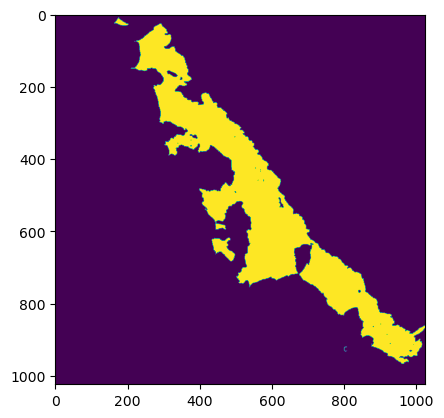

In [36]:
target_dir = '/Users/francesco/Desktop/prove/y_test_avg_temporal_prova_cv_conv7_relu_outputs_sigmoid.weights.npy'

target = np.load(target_dir, allow_pickle=True)

plt.imshow(target[0,:,:,0])

In [29]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

def diceloss(y_true, y_pred):
    smooth = 1e-6
    y_true, y_pred = tf.cast(
        y_true, dtype=tf.float32), tf.cast(y_pred, tf.float32)
    nominator = 2 * tf.reduce_sum((tf.multiply(y_pred, y_true)))
    denominator = tf.reduce_sum(y_pred) + tf.reduce_sum(y_true) + smooth
    result = 1 - tf.divide(nominator, denominator)
    return result

2024-05-13 17:19:06.073998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dice loss:  tf.Tensor(0.0043517947, shape=(), dtype=float32)


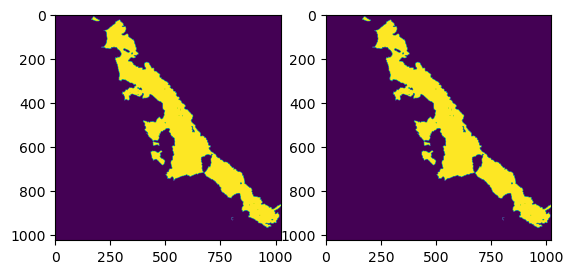

Dice loss:  tf.Tensor(0.0030230284, shape=(), dtype=float32)


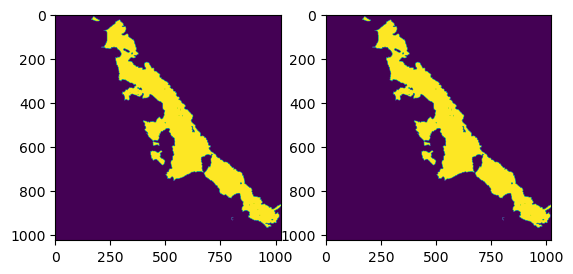

Dice loss:  tf.Tensor(0.011193216, shape=(), dtype=float32)


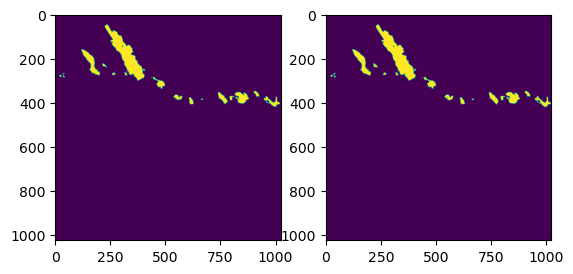

Dice loss:  tf.Tensor(0.0068178773, shape=(), dtype=float32)


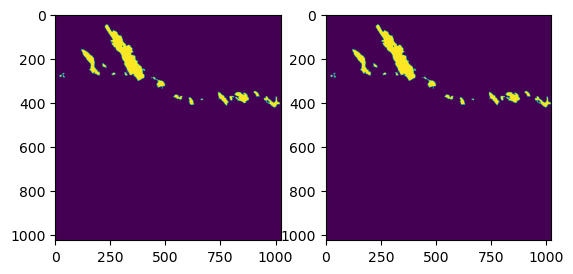

Dice loss:  tf.Tensor(0.0069043636, shape=(), dtype=float32)


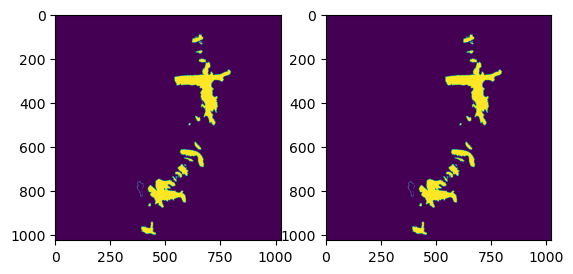

Dice loss:  tf.Tensor(0.005806029, shape=(), dtype=float32)


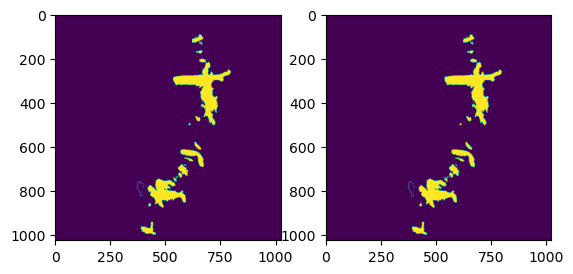

Dice loss:  tf.Tensor(0.0046494603, shape=(), dtype=float32)


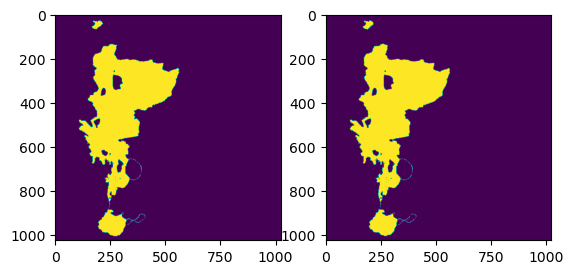

Dice loss:  tf.Tensor(0.0041101575, shape=(), dtype=float32)


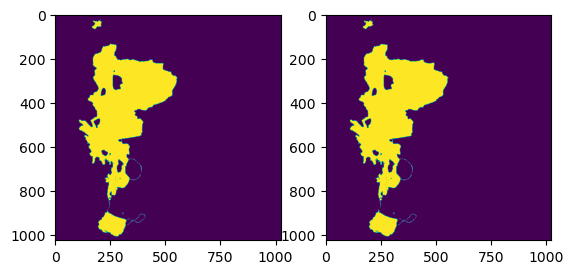

Dice loss:  tf.Tensor(0.007954121, shape=(), dtype=float32)


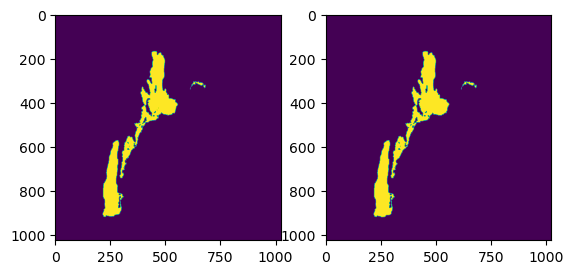

Dice loss:  tf.Tensor(0.0061344504, shape=(), dtype=float32)


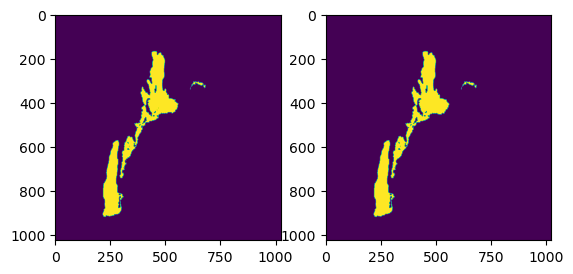

Dice loss:  tf.Tensor(0.022898912, shape=(), dtype=float32)


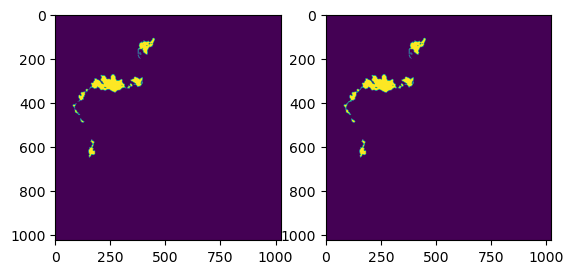

Dice loss:  tf.Tensor(0.012818456, shape=(), dtype=float32)


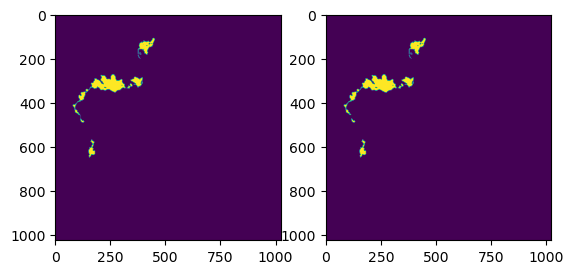

Dice loss:  tf.Tensor(0.01424104, shape=(), dtype=float32)


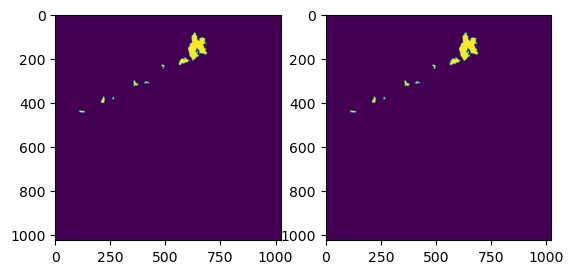

Dice loss:  tf.Tensor(0.008418858, shape=(), dtype=float32)


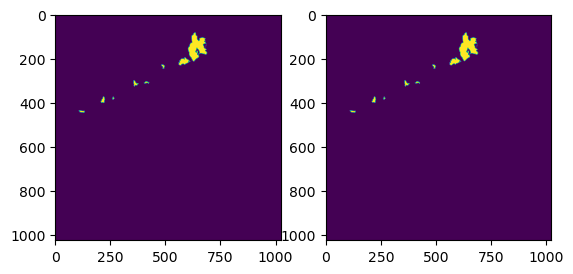

Dice loss:  tf.Tensor(0.0121644735, shape=(), dtype=float32)


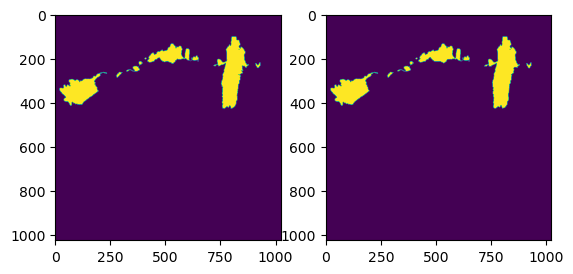

Dice loss:  tf.Tensor(0.01367259, shape=(), dtype=float32)


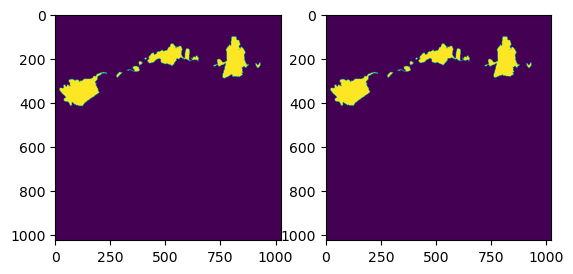

Dice loss:  tf.Tensor(0.013796449, shape=(), dtype=float32)


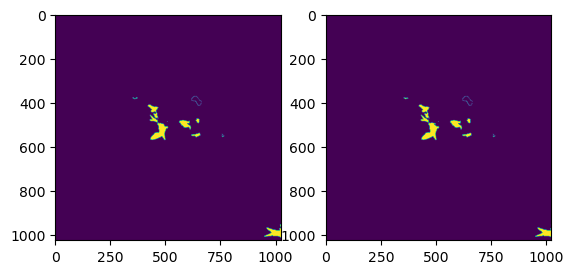

Dice loss:  tf.Tensor(0.007988334, shape=(), dtype=float32)


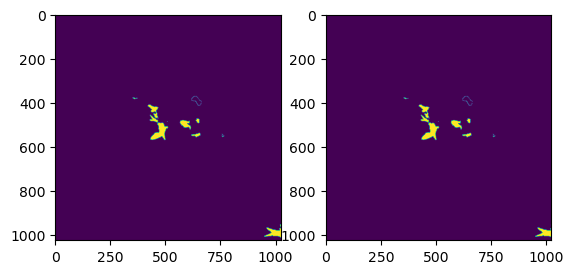

Dice loss:  tf.Tensor(0.014108121, shape=(), dtype=float32)


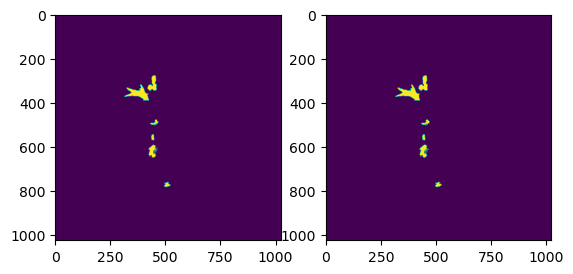

Dice loss:  tf.Tensor(0.01166302, shape=(), dtype=float32)


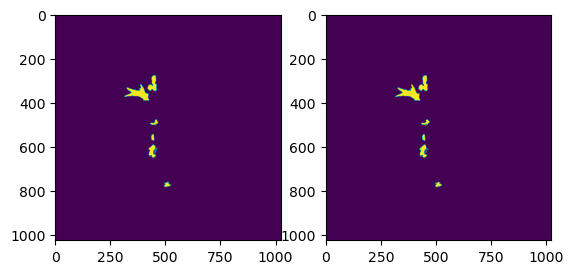

Dice loss:  tf.Tensor(0.0016350746, shape=(), dtype=float32)


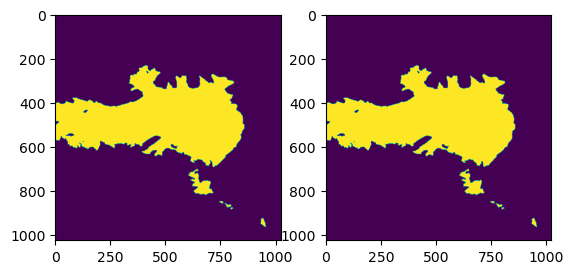

Dice loss:  tf.Tensor(0.0026074648, shape=(), dtype=float32)


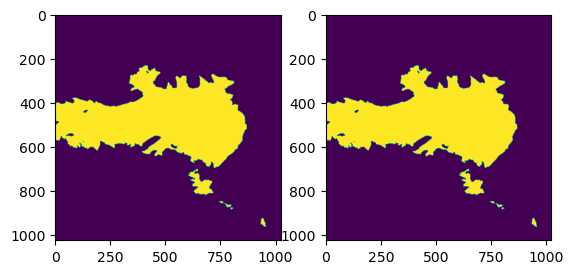

Dice loss:  tf.Tensor(0.006097853, shape=(), dtype=float32)


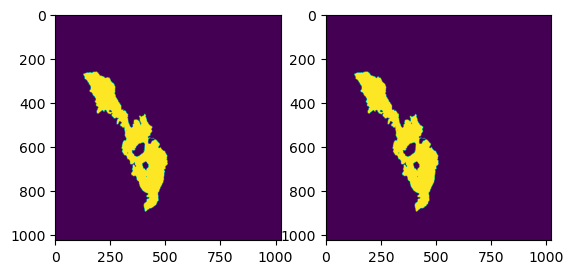

Dice loss:  tf.Tensor(0.008856595, shape=(), dtype=float32)


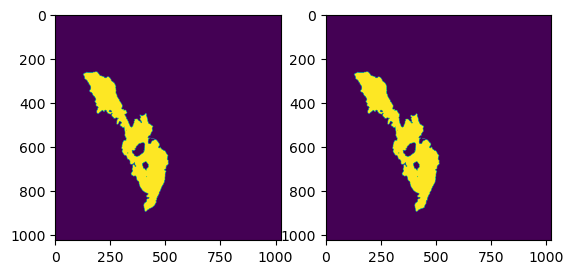

Dice loss:  tf.Tensor(0.0020102859, shape=(), dtype=float32)


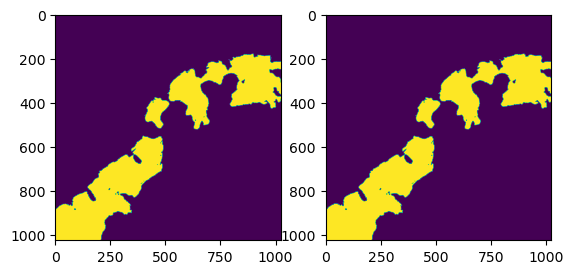

Dice loss:  tf.Tensor(0.0012329221, shape=(), dtype=float32)


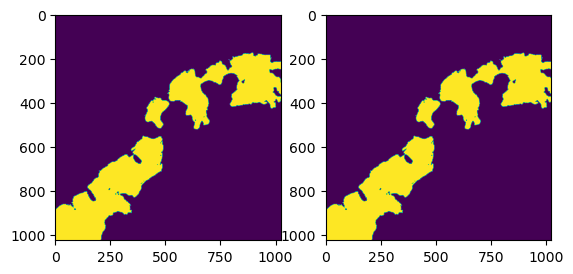

Dice loss:  tf.Tensor(0.0023566484, shape=(), dtype=float32)


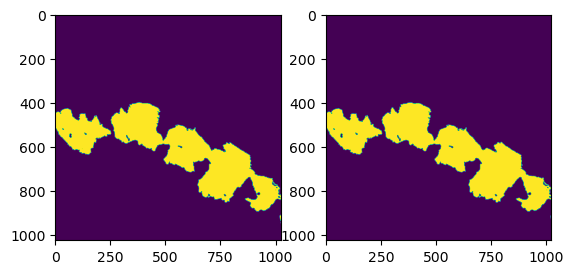

Dice loss:  tf.Tensor(0.0018257499, shape=(), dtype=float32)


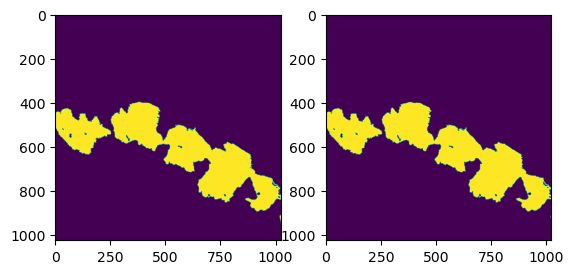

Dice loss:  tf.Tensor(0.0040450096, shape=(), dtype=float32)


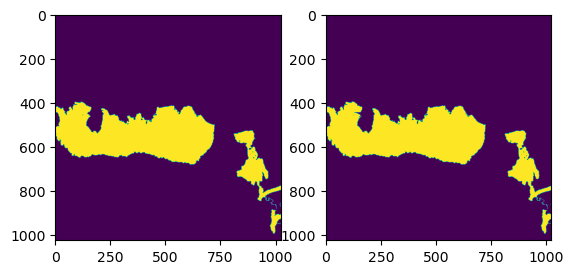

Dice loss:  tf.Tensor(0.0026996732, shape=(), dtype=float32)


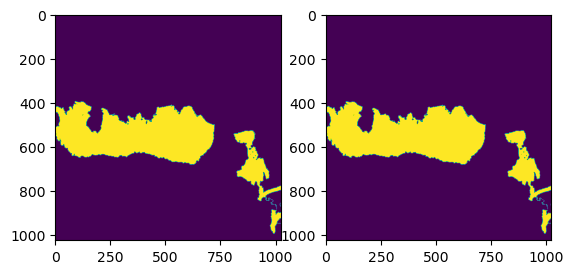

Dice loss:  tf.Tensor(0.014948487, shape=(), dtype=float32)


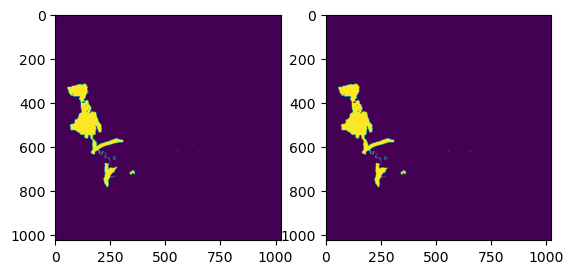

Dice loss:  tf.Tensor(0.012539864, shape=(), dtype=float32)


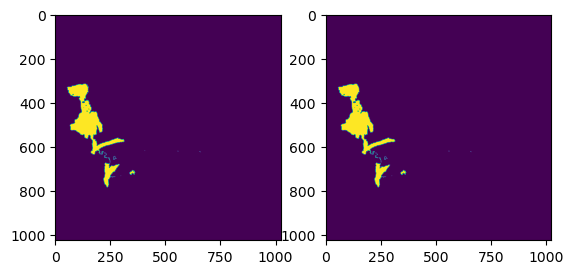

Dice loss:  tf.Tensor(0.0023918748, shape=(), dtype=float32)


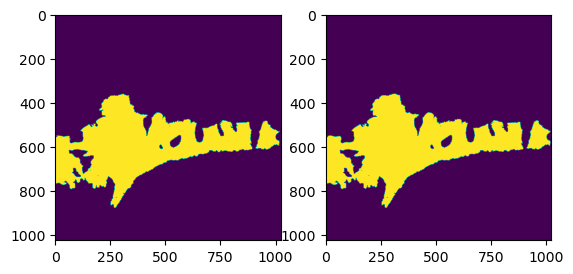

Dice loss:  tf.Tensor(0.0018213391, shape=(), dtype=float32)


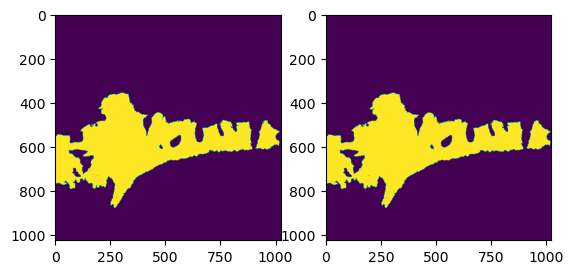

Dice loss:  tf.Tensor(0.0047858953, shape=(), dtype=float32)


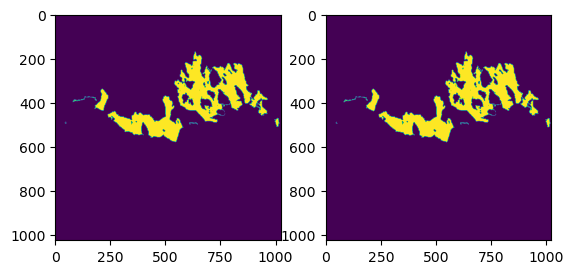

Dice loss:  tf.Tensor(0.0035919547, shape=(), dtype=float32)


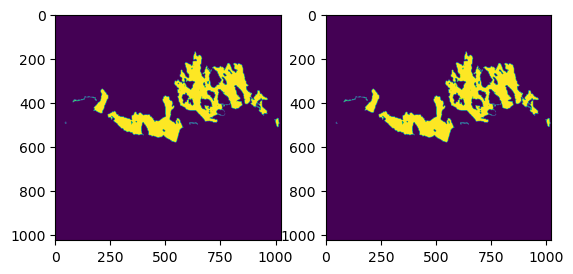

Dice loss:  tf.Tensor(0.0011259317, shape=(), dtype=float32)


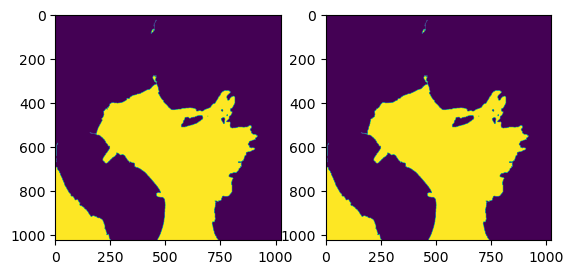

Dice loss:  tf.Tensor(0.0008633137, shape=(), dtype=float32)


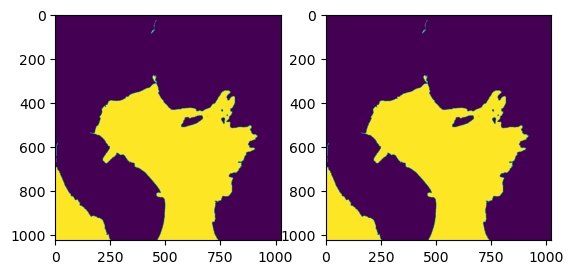

Dice loss:  tf.Tensor(0.0022754073, shape=(), dtype=float32)


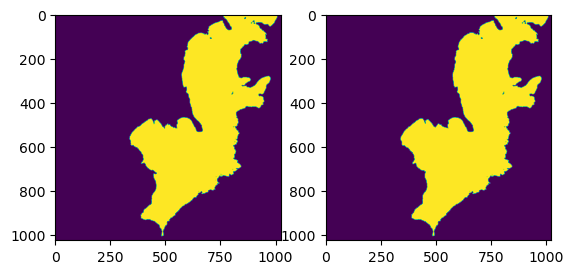

Dice loss:  tf.Tensor(0.001943171, shape=(), dtype=float32)


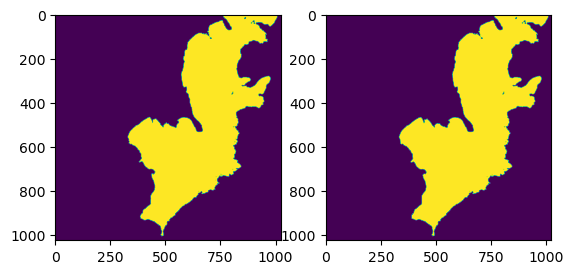

Dice loss:  tf.Tensor(0.0033963323, shape=(), dtype=float32)


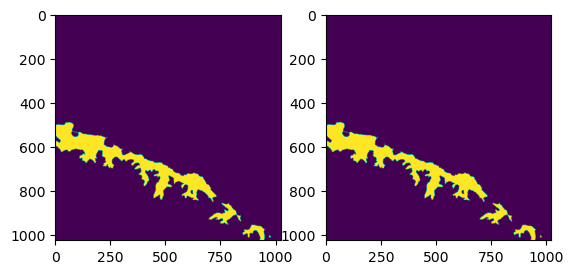

Dice loss:  tf.Tensor(0.0033911467, shape=(), dtype=float32)


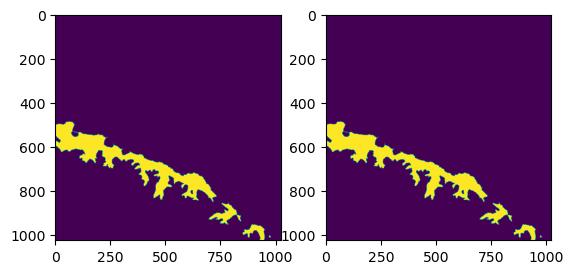

Dice loss:  tf.Tensor(0.0031821132, shape=(), dtype=float32)


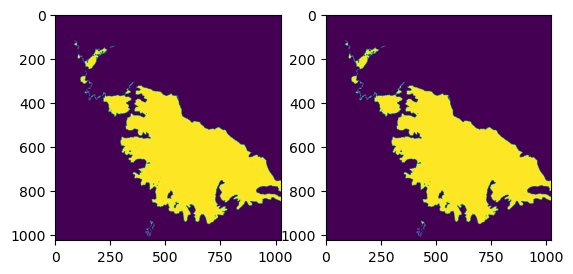

Dice loss:  tf.Tensor(0.0020903945, shape=(), dtype=float32)


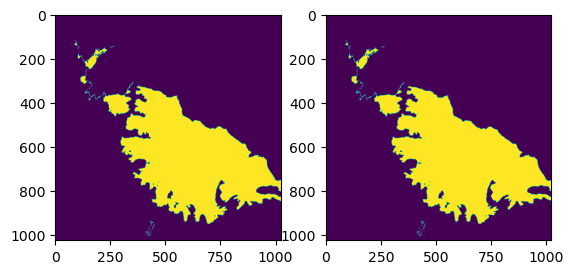

Dice loss:  tf.Tensor(0.005032599, shape=(), dtype=float32)


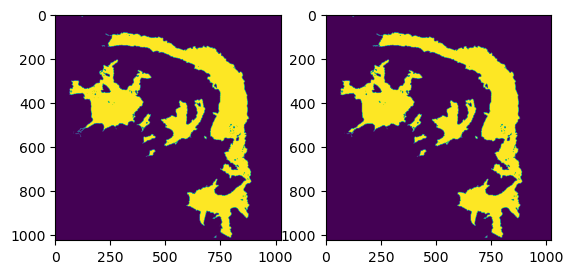

Dice loss:  tf.Tensor(0.003964603, shape=(), dtype=float32)


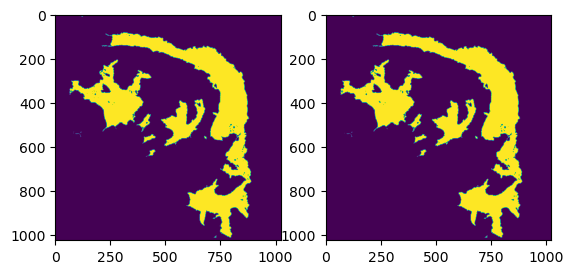

Dice loss:  tf.Tensor(0.022565782, shape=(), dtype=float32)


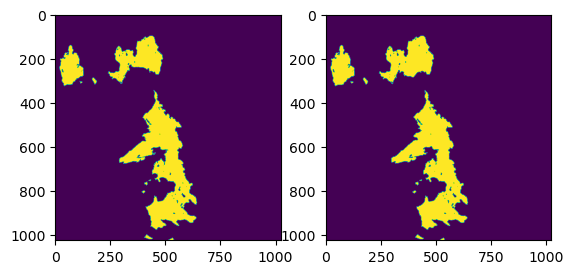

Dice loss:  tf.Tensor(0.05633819, shape=(), dtype=float32)


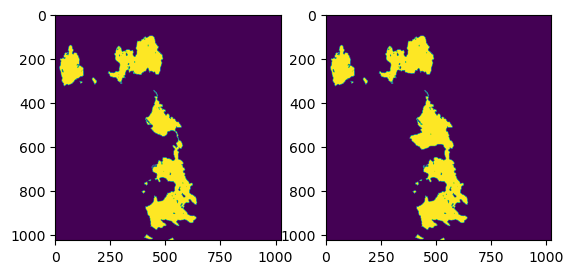

Dice loss:  tf.Tensor(0.002241671, shape=(), dtype=float32)


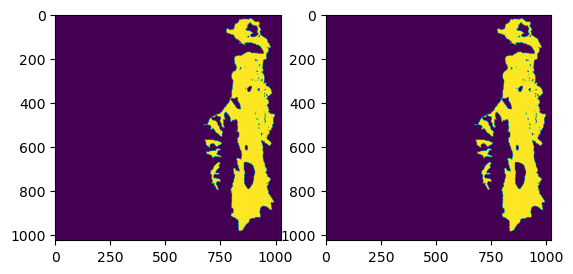

Dice loss:  tf.Tensor(0.0049621463, shape=(), dtype=float32)


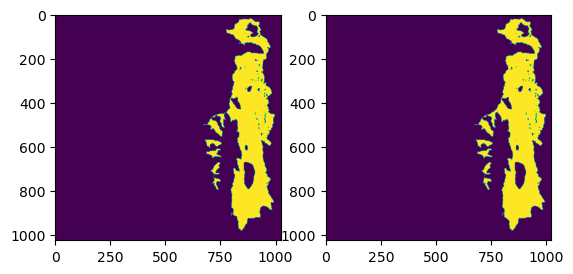

Dice loss:  tf.Tensor(0.0011936426, shape=(), dtype=float32)


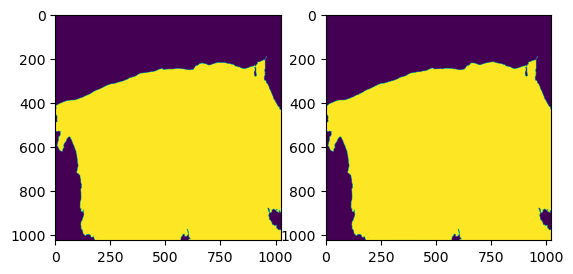

Dice loss:  tf.Tensor(0.0003924966, shape=(), dtype=float32)


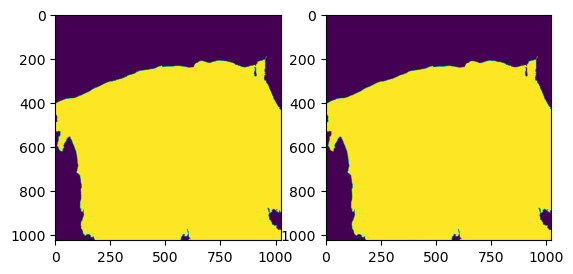

Dice loss:  tf.Tensor(0.00073188543, shape=(), dtype=float32)


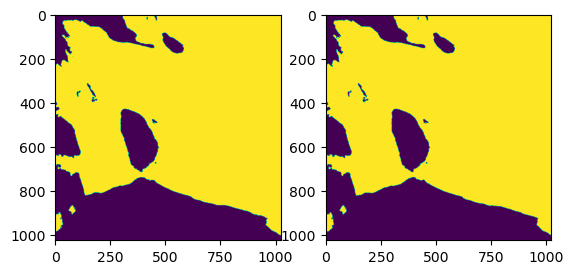

Dice loss:  tf.Tensor(0.0004207492, shape=(), dtype=float32)


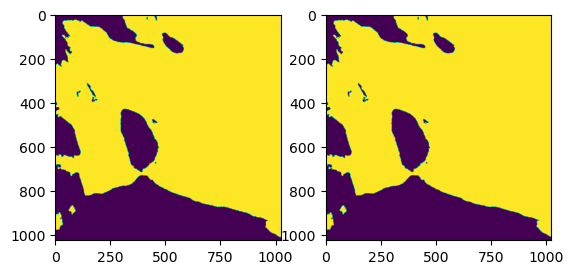

Dice loss:  tf.Tensor(0.00040715933, shape=(), dtype=float32)


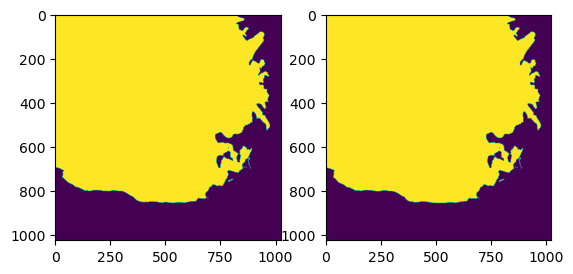

Dice loss:  tf.Tensor(0.00041276217, shape=(), dtype=float32)


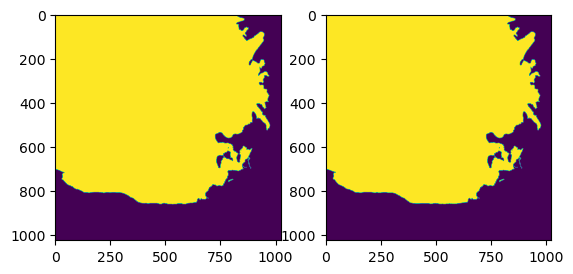

In [37]:
for image in range(0, y_pred.shape[0]):

    plt.subplot(1, 2, 1)
    plt.imshow(target[image,:,:,0])
    plt.subplot(1, 2, 2)
    plt.imshow(y_pred[image,:,:,0])
    dice = diceloss(target[image], y_pred[image])

    dice = diceloss(target[image], y_pred[image])
    print('Dice loss: ', dice)
    plt.show()

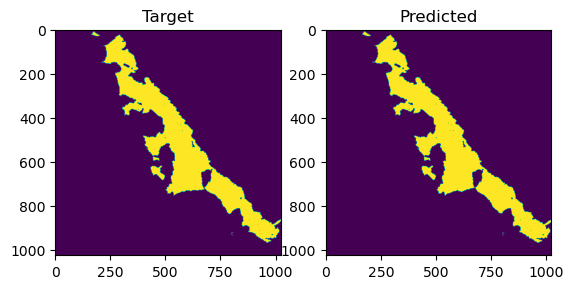

In [31]:
import matplotlib.pyplot as plt
number_id = 0

# Plot target[0,:,:,0]
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and index 1
plt.imshow(target[number_id,:,:,0])
plt.title('Target')

prediction= y_pred[number_id,:,:,0]
max = np.max(prediction.flatten())
prediction = np.where(prediction > max/2, 1, 0)

# Plot y_pred[0,:,:,0]
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and index 2
plt.imshow(prediction)
plt.title('Predicted')

#calculate the duce loss

plt.show()


In [32]:
path_pred = '/Users/francesco/Desktop/prove/y_pred_avg.npy'
y_pred_avg = np.load(path_pred, allow_pickle=True)

path_test = '/Users/francesco/Desktop/prove/y_test_avg.npy'
y_test_avg = np.load(path_test, allow_pickle=True)

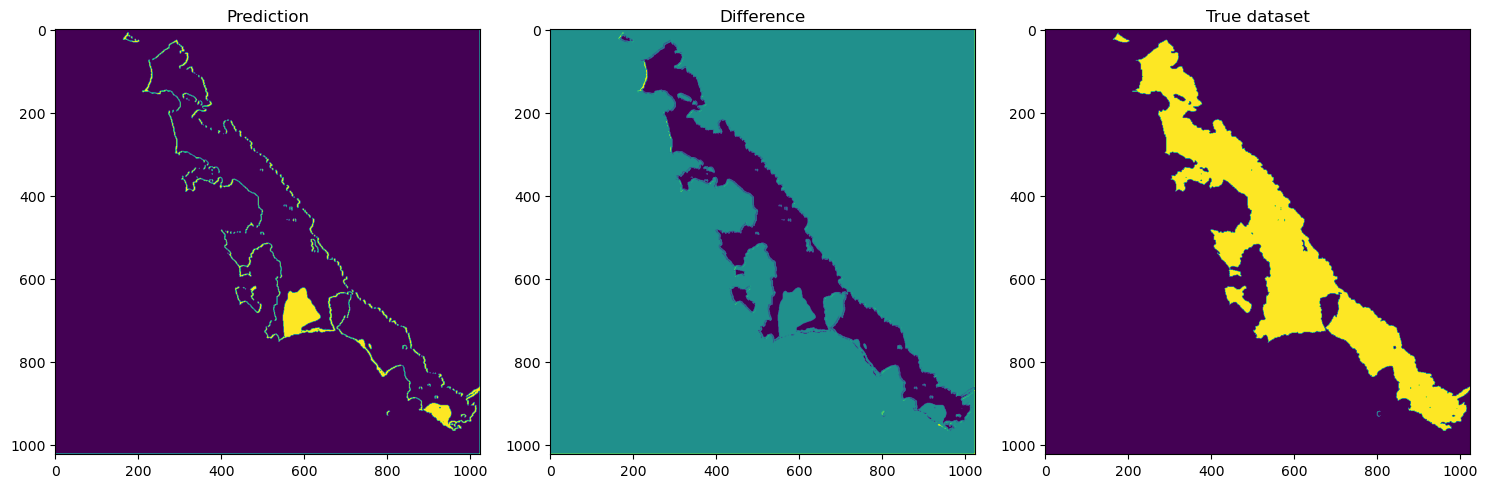

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

id = 0
# Plot prova
prova = y_pred_avg[id, :, :, 0]
prova = np.where(prova < 0.4924, 0, 1)
im1 = axes[0].imshow(prova, cmap='viridis')
axes[0].set_title('Prediction')

# Plot difference
difference = prova - y_test_avg[id, :, :, 0]
im2 = axes[1].imshow(difference, cmap='viridis')
axes[1].set_title('Difference')

im3 = axes[2].imshow(y_test_avg[id, :, :, 0], cmap='viridis')
axes[2].set_title('True dataset')

plt.tight_layout()
plt.show()


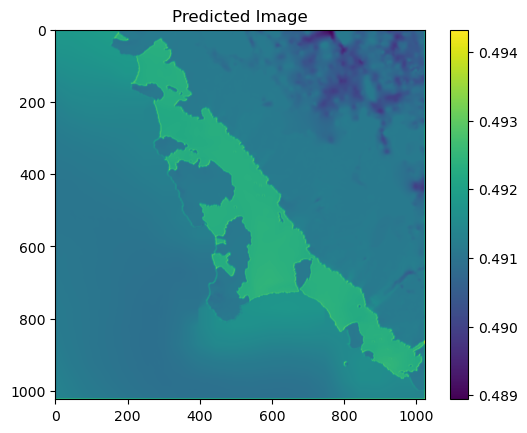

In [16]:
prova = y_pred_avg[0, :, :, 0]

plt.imshow(prova, cmap='viridis')
plt.title('Predicted Image')
plt.colorbar()

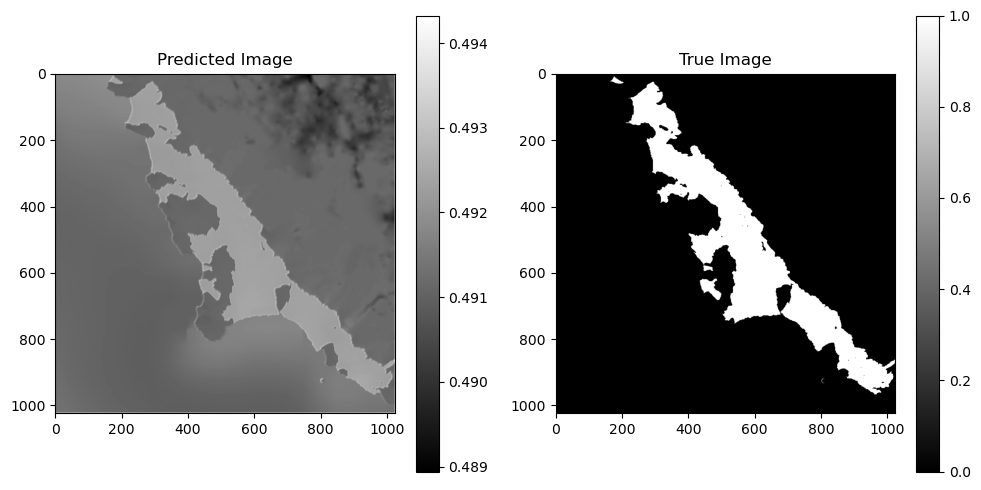

In [17]:
import matplotlib.pyplot as plt

# Assuming y_pred_avg and y_test_avg are numpy arrays
# with shape (66, 1024, 1024, 1)

fig_number = 0

# Plot y_pred_avg[0,:,:,0]


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_pred_avg[fig_number, :, :, 0], cmap='gray')
plt.title('Predicted Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(y_test_avg[fig_number, :, :, 0], cmap='gray')
plt.title('True Image')
plt.colorbar()

plt.tight_layout()
plt.show()


In [18]:
path_output = '/Users/francesco/Desktop/prove/target.npy'
#load the predictions
targets = np.load(path_output, allow_pickle=True)

path_features = '/Users/francesco/Desktop/prove/features.npy'
features = np.load(path_features, allow_pickle=True)


In [19]:
global_max_min = [] 

for sample in range(len(features)):


    var_1 = features[sample, :, :, 0]
    var_2 = features[sample, :, :, 1]
    var_3 = features[sample, :, :, 2]
    var_4 = features[sample, :, :, 3]
    var_5 = features[sample, :, :, 4]

    #find max and min values
    max_var_1 = np.max(var_1)
    min_var_1 = np.min(var_1)
    max_var_2 = np.max(var_2)
    min_var_2 = np.min(var_2)
    max_var_3 = np.max(var_3)
    min_var_3 = np.min(var_3)
    max_var_4 = np.max(var_4)
    min_var_4 = np.min(var_4)
    max_var_5 = np.max(var_5)
    min_var_5 = np.min(var_5)

    print('Sample:', sample, 'the max values are the following:', max_var_1, max_var_2, max_var_3, max_var_4, max_var_5, 'the min values are the following:', min_var_1, min_var_2, min_var_3, min_var_4, min_var_5)

    max_min = [max_var_1, min_var_1, max_var_2, min_var_2, max_var_3, min_var_3, max_var_4, min_var_4, max_var_5, min_var_5]
    global_max_min.append(max_min)



Sample: 0 the max values are the following: 0.9316602945327759 0.9558333333333333 0.051193528280970596 0.03838605240029347 0.057708896696567535 the min values are the following: 0.0 0.0 -0.20739735687687721 -0.15769838073989076 -0.08660269528627396
Sample: 1 the max values are the following: 0.9316602945327759 0.9491666666666667 0.051616648449885276 0.03838605240029347 0.02526814304292202 the min values are the following: 0.0 0.0 -0.21482839187980807 -0.15966920858354466 -0.0840521827340126
Sample: 2 the max values are the following: 0.9316602945327759 0.9441666666666667 0.05161665007472038 0.03838605433702469 0.03542977571487427 the min values are the following: 0.0 0.0 -0.20589207112789154 -0.1567736715078354 -0.07656747847795486
Sample: 3 the max values are the following: 0.9316602945327759 0.9016666666666667 0.0483781136572361 0.03723961114883423 0.023746561259031296 the min values are the following: 0.0 0.0 -0.20585766434669495 -0.15998023748397827 -0.15733611583709717
Sample: 4 t

In [136]:
#find maximum and minimum values in global_max_min
max_min = np.array(global_max_min)
max_values = np.max(global_max_min, axis=0)
min_values = np.min(global_max_min, axis=0)

print('The maximum values are:', max_values)
print('The minimum values are:', min_values)


The maximum values are: [ 1.          0.          0.99916667  0.          0.34057212 -0.001164
  0.50232989 -0.00331271  0.27851912  0.        ]
The minimum values are: [ 0.23697768 -0.01157993  0.64083333  0.          0.00533295 -0.9373767
  0.00220291 -0.88171375  0.         -0.72148085]


In [20]:
#I want to create an index which has the same lenght of the target array, but is 1 for the first 11 elements, 2 for the following 11 elements, and so on
index = np.zeros(len(targets))
for i in range(len(targets)):
    index[i] = int(i/11)+1

#I want to create an index which has the same lenght of the target array, which goes from 2005 to 2015, adn then repeat till the end
years = np.zeros(len(targets))
for i in range(len(targets)):
    years[i] = 2005 + i%11

index_tot = np.concatenate((index.reshape(-1,1).astype(int), years.reshape(-1,1).astype(int)), axis=1)

In [21]:
index_tot

array([[   1, 2005],
       [   1, 2006],
       [   1, 2007],
       [   1, 2008],
       [   1, 2009],
       [   1, 2010],
       [   1, 2011],
       [   1, 2012],
       [   1, 2013],
       [   1, 2014],
       [   1, 2015],
       [   2, 2005],
       [   2, 2006],
       [   2, 2007],
       [   2, 2008],
       [   2, 2009],
       [   2, 2010],
       [   2, 2011],
       [   2, 2012],
       [   2, 2013],
       [   2, 2014],
       [   2, 2015],
       [   3, 2005],
       [   3, 2006],
       [   3, 2007],
       [   3, 2008],
       [   3, 2009],
       [   3, 2010],
       [   3, 2011],
       [   3, 2012],
       [   3, 2013],
       [   3, 2014],
       [   3, 2015],
       [   4, 2005],
       [   4, 2006],
       [   4, 2007],
       [   4, 2008],
       [   4, 2009],
       [   4, 2010],
       [   4, 2011],
       [   4, 2012],
       [   4, 2013],
       [   4, 2014],
       [   4, 2015],
       [   5, 2005],
       [   5, 2006],
       [   5, 2007],
       [   5,

In [18]:
#Spatial division

X_test = []
y_test = []

cv_1_features, cv_1_targets = [], []
cv_2_features, cv_2_targets = [], []
cv_3_features, cv_3_targets = [], []
cv_4_features, cv_4_targets = [], []
cv_5_features, cv_5_targets = [], []

for sample in range(len(features)):    
    region, year = index_tot[sample]

    if region in [1,8,9,12,17,21]:
        y_test.append(targets[sample])
        X_test.append(features[sample])
    if region in [3,4,15,25]:
        cv_1_features.append(features[sample])
        cv_1_targets.append(targets[sample])
    if region in [5,18,20,23]:
        cv_2_features.append(features[sample])
        cv_2_targets.append(targets[sample])
    if region in [2,6,13,22]:
        cv_3_features.append(features[sample])
        cv_3_targets.append(targets[sample])
    if region in [7,10,14, 24, 26]:
        cv_4_features.append(features[sample])
        cv_4_targets.append(targets[sample])
    if region in [11,16,19,27,28]:
        cv_5_features.append(features[sample])
        cv_5_targets.append(targets[sample])

cv_features = [cv_1_features, cv_2_features, cv_3_features, cv_4_features, cv_5_features]
cv_targets = [cv_1_targets, cv_2_targets, cv_3_targets, cv_4_targets, cv_5_targets]

In [19]:
cv_2_features[1]

array([[[ 6.94700539e-01,  0.00000000e+00,  7.50994394e-03,
         -3.71074519e-03,  0.00000000e+00,  0.00000000e+00],
        [ 6.94452703e-01,  0.00000000e+00,  7.48261599e-03,
         -3.82262321e-03,  0.00000000e+00,  0.00000000e+00],
        [ 6.94912732e-01,  0.00000000e+00,  7.44805417e-03,
         -3.91854480e-03,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.44166667e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.44166667e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.42500000e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 6.94960654e-01,  0.00000000e+00,  7.54636282e-03,
         -3.66106802e-03,  0.00000000e+00,  0.00000000e+00],
        [ 6.94807827e-01,  0.00000000e+00,  7.51868928e-03,
         -3.78616314e-03,  0.00000000e+00,  0.00000000e+00],
        [ 6.95311

In [22]:
#temporal division

X_test = []
y_test = []

cv_1_features, cv_1_targets = [], []
cv_2_features, cv_2_targets = [], []
cv_3_features, cv_3_targets = [], []
cv_4_features, cv_4_targets = [], []
cv_5_features, cv_5_targets = [], []

for sample in range(len(targets)):
    region, year = index_tot[sample]

    if year in [2008,2012]:
        y_test.append(targets[sample])
        X_test.append(features[sample])
    if year in [2005,2011]:
        cv_1_features.append(features[sample])
        cv_1_targets.append(targets[sample])
    if region in [2006,2013]:
        cv_2_features.append(features[sample])
        cv_2_targets.append(targets[sample])
    if region in [2007,2014]:
        cv_3_features.append(features[sample])
        cv_3_targets.append(targets[sample])
    if region in [2009,2015]:
        cv_4_features.append(features[sample])
        cv_4_targets.append(targets[sample])
    if region in [2010]:
        cv_5_features.append(features[sample])
        cv_5_targets.append(targets[sample])

cv_features = [cv_1_features, cv_2_features, cv_3_features, cv_4_features, cv_5_features]
cv_targets = [cv_1_targets, cv_2_targets, cv_3_targets, cv_4_targets, cv_5_targets]



In [24]:
X_test = np.array(X_test)

In [27]:
y_test = np.array(y_test)

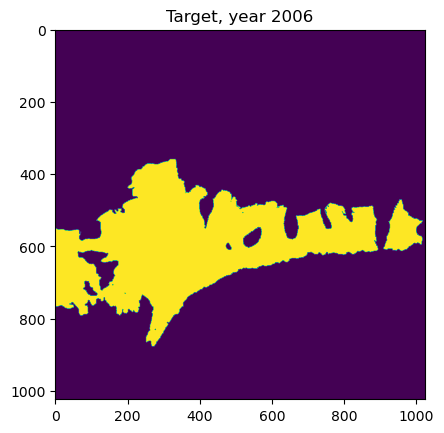

In [77]:
prova = (y_test_avg[44,:,:,0])
plt.title('Target, year 2006')

plt.imshow(prova)

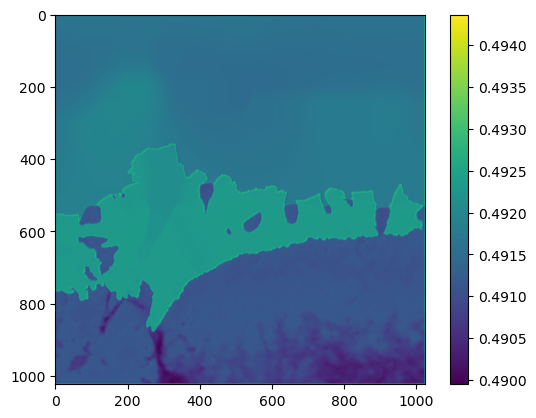

In [66]:
plt.imshow(y_pred_avg[45,:,:,0])
#add the colorbar
plt.colorbar()


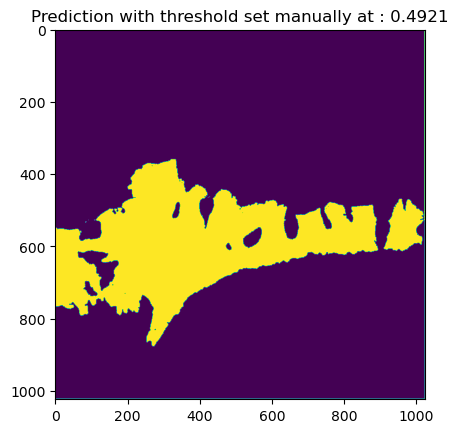

In [27]:
ugo = y_pred_avg[44,:,:,0]
threshold = 0.4921
ugo = np.where(ugo > threshold, 1, 0)
plt.title('Prediction with threshold set manually at : '+str(threshold))

plt.imshow(ugo)



In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten the predicted and true masks to compare 1D arrays
y_pred_flat = y_pred_avg[44,:,:,0].flatten()
y_true_flat = y_test_avg[44,:,:,0].flatten()

# Apply threshold if needed
threshold = 0.4920
y_pred_binary = (y_pred_flat >= threshold).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_true_flat, y_pred_binary)
precision = precision_score(y_true_flat, y_pred_binary)
recall = recall_score(y_true_flat, y_pred_binary)
f1 = f1_score(y_true_flat, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9165554046630859
Precision: 0.6918495175985558
Recall: 0.9986130162307696
F1 Score: 0.8173975107059679


In [34]:
for i in range(len(cv_targets)):

    y_val = cv_targets[i]

    print('The shape of y_val is:', np.shape(y_val))

    y_train = np.concatenate([cv_targets[j] for j in range(len(cv_targets)) if j != i])
    print('The shape of y_train is:', np.shape(y_train))

The shape of y_val is: (44, 1024, 1024, 1)
The shape of y_train is: (198, 1024, 1024, 1)
The shape of y_val is: (44, 1024, 1024, 1)
The shape of y_train is: (198, 1024, 1024, 1)
The shape of y_val is: (44, 1024, 1024, 1)
The shape of y_train is: (198, 1024, 1024, 1)
The shape of y_val is: (55, 1024, 1024, 1)


KeyboardInterrupt: 

In [30]:
len(cv_targets)

5

In [18]:
cv_features = np.array(cv_features)
cv_targets = np.array(cv_targets)

In [20]:
cv_features

array([], dtype=float64)

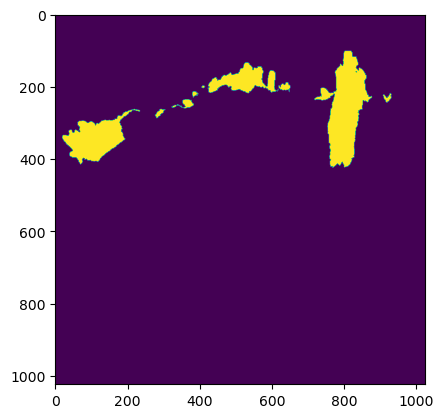

In [113]:
plt.imshow(y_test[12,:,:,0])

In [46]:
sea_mask = '/Users/francesco/Desktop/sea_mask.npy'
common_years = np.arange(2005,2017,1)
ids = np.arange(1, 29, 1)
#open the ice mask
sea_mask = np.load(sea_mask, allow_pickle=True)
sea_mask = pd.DataFrame(sea_mask, index=ids, columns=common_years)

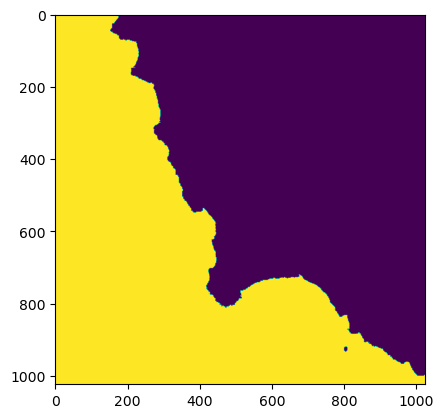

In [47]:
plt.imshow(sea_mask.loc[1,2005])

In [44]:
common_years = np.arange(2005, 2017)
dfs = []

for region in range(1, 29):  # Modify range(1, 29) if you have regions 1 to 28
    file_path = f'/Users/francesco/Desktop/prove/v_x_region_{region}.npy'
    data = np.load(file_path, allow_pickle=True)
    index = [region]
    df = pd.DataFrame(data, index=index, columns=common_years)
    dfs.append(df)

bm = pd.concat(dfs, axis=0)



In [12]:
bm.index

Int64Index([10, 11, 12], dtype='int64')

In [30]:
#create a mask of boolean shaped 1024x1024
mask = np.zeros((1024,1024), dtype=bool)
mask[512, 512] = True


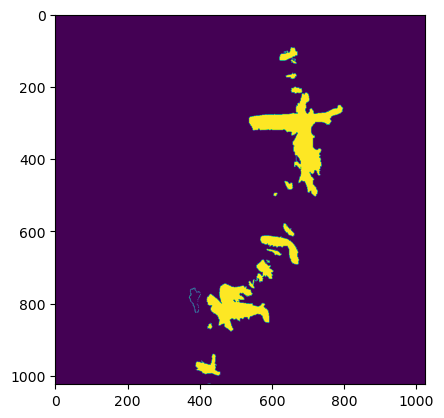

In [49]:
ice_mask = '/Users/francesco/Desktop/ice_mask.npy'
common_years = np.arange(2005,2017,1)
ids = np.arange(1, 29, 1)
#open the ice mask
ice_mask = np.load(ice_mask, allow_pickle=True)
ice_mask = pd.DataFrame(ice_mask, index=ids, columns=common_years)

# region_id = 24
# #ice_mask = ice_mask.loc[region_id]

# print('The shape of the ice mask is:', ice_mask.shape)
# shape_file = '/Users/francesco/Desktop/squares.shp.gpkg'
# df = read_shapefile(shape_file, region_id)

plt.imshow(ice_mask.loc[3, 2012])

In [10]:
for i in ids:
    for year in common_years:
        prova = ice_mask.loc[i, year]
        print('The shape of the ice mask of region ', i, ' in the year ', year, ' is:', prova.shape)

The shape of the ice mask of region  1  in the year  2005  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2006  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2007  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2008  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2009  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2010  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2011  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2012  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2013  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2014  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2015  is: (1024, 1024)
The shape of the ice mask of region  1  in the year  2016  is: (1024, 1024)
The shape of the ice mask of region  2  in the year  2005  is: (1024, 1024)
The shape of

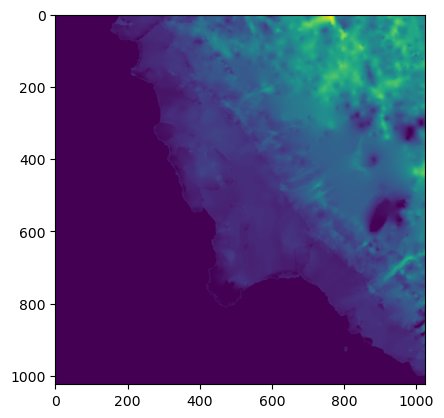

In [27]:
thickness = '/Users/francesco/Desktop/thickness_region_1.npy'
common_years = np.arange(2005,2017,1)

 
id = [1]
thickness = np.load(thickness, allow_pickle=True)
thickness = pd.DataFrame(thickness, index = id, columns = common_years)

plt.imshow(thickness.loc[1, 2007])

In [28]:
masks = '/Users/francesco/Desktop/ice_mask.npy'

id = np.arange(1,29,1)


masks = np.load(masks, allow_pickle=True)
masks = pd.DataFrame(masks, index = id, columns = common_years)

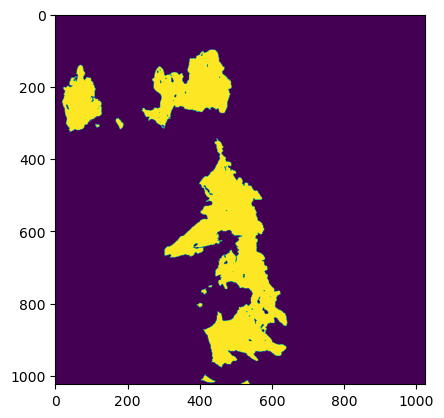

In [54]:
plt.imshow(masks.loc[24, 2007])

In [23]:
path_to_velocity = '/Users/francesco/Desktop/v_region_1.npy'

velocity = np.load(path_to_velocity, allow_pickle=True)
velocity = pd.DataFrame(velocity, index = id, columns = common_years)

In [ ]:
path_to_sic = '/Users/francesco/Desktop/used_2/seaice_conc_monthly_sh_200501.tif'

In [36]:
import os

# Define the root directory
root = '/Users/francesco/Desktop/Thesis/Data/monthly/used_2/'


# Define the list of files
list_of_files = []
common_years = np.arange(2005,2017,1)

# Loop through the years and months to generate filenames
for year in range(2005, 2017):
    for month in range(1, 13):
        # Pad single-digit months with a leading zero
        padded_month = f"{month:02d}"
        # Generate the filename and add it to the list
        filename = f"{root}seaice_conc_monthly_sh_{year}{padded_month}.tif"
        list_of_files.append(filename)

# Print the list of files
print("List of files:")
for file in list_of_files:
    print(file)



List of files:
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200501.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200502.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200503.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200504.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200505.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200506.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200507.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200508.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200509.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200510.tif
/Users/francesco/Desktop/Thesis/Data/monthly/used_2/seaice_conc_monthly_sh_200511.tif
/Users/francesco/Desktop/Thesis/Data/mo

In [45]:
df.index

Int64Index([25], dtype='int64')

In [50]:
sic = pd.DataFrame(index = df.index, columns = common_years)

for id in df.index:

    month = 0

    for year in common_years:

        image_avg = np.zeros((1024,1024))

        for i in range(0,12):

            j = month + i
            file = list_of_files[j]
            #print(file)

            with rasterio.open(file, crs = 'EPSG:3031') as src:

                xmin, ymin, xmax, ymax = df.loc[id, 'boundaries']
                window = rasterio.windows.from_bounds(xmin, ymin, xmax, ymax, src.transform) 
                image = src.read(1, window=window) #this is bm in the window
                image_avg = image_avg + image
                    
                if i == 11:
                    #print('Saved till month ' + str(j))
                    image_avg = image_avg/12
                    sic.loc[id,year] = image_avg
                    month = month + 12

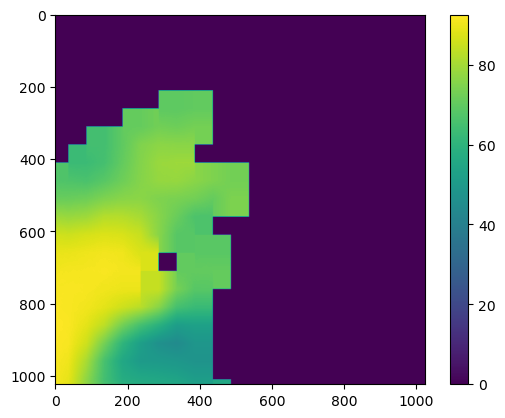

In [58]:
prova = sic.loc[24, 2007]
prova = np.where(prova > 100, 0, prova)

plt.imshow(prova)
plt.colorbar()

In [11]:
path_to_sic = '/Users/francesco/Desktop/sic_region_1.npy'
common_years = np.arange(2005,2017,1)
id = [1]
#load the sic
sic = np.load(path_to_sic, allow_pickle=True)
sic = pd.DataFrame(sic, index = id, columns = common_years)

In [20]:
path_to_bm = '/Users/francesco/Desktop/bm_region_1.npy'

bm = np.load(path_to_bm, allow_pickle=True)
bm = pd.DataFrame(bm, index = id, columns = common_years)